In [13]:
import sys

sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_modeling.correlation_index import Beta

In [14]:
df_price = pd.read_pickle("../storage/df_raw_data/df_price_17-01-01_23-12-31.pkl")
df_mcpi = pd.read_pickle("../storage/df_raw_data/df_mcpi_17-01-01_23-12-31.pkl")

In [15]:
# 베타계수 구하기
# duration = 365
# df_beta = Beta().beta_index(duration, df_mcpi, df_price)

In [16]:
df_beta = pd.read_pickle("../storage/df_raw_data/df_beta.pkl")

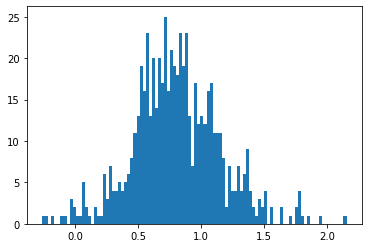

In [17]:
plt.hist(df_beta, bins=100)
plt.show()

Beta와 PER의 관계 plot

In [18]:
df_beta = pd.read_pickle("../storage/df_raw_data/df_beta.pkl")
df_per_12 = pd.read_pickle("../storage/df_raw_data/df_per_month_12.pkl")
df_list = pd.read_pickle("../storage/df_raw_data/df_list_song_artist.pkl")

df_per = pd.DataFrame(df_per_12.iloc[:, -1]).dropna(axis=0)

In [19]:
def not_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    ub, lb = q1 + (1.5 * iqr), q1 - (1.5 * iqr)

    return np.where((data < ub) & (data >= lb))

In [20]:
idx_beta, idx_per = not_outliers_iqr(df_beta)[0], not_outliers_iqr(df_per)[0]
df_beta = df_beta.iloc[idx_beta]
df_per = df_per.iloc[idx_per]

In [21]:
df_plot = pd.concat([df_beta.T, df_per.T], join='inner')
df_plot.index = ['beta', 'per']
df_temp = df_plot.T.copy()

In [22]:
def onclick(event):
    df_temp['beta'] = (df_plot.T['beta']-event.xdata).abs() * 10
    df_temp['per'] = (df_temp['per'] - event.ydata).abs()

    song_num = df_plot.T.iloc[df_temp.sum(axis=1).argsort()[:1]].index[0]
    temp = df_list.loc[song_num].tolist()
    title, artist = temp[0], temp[1]
    print('song_num=%s, artist=%s, title=%s beta=%f, per=%f' % (song_num, artist, title, event.xdata, event.ydata))

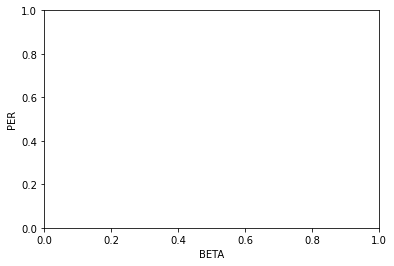

In [23]:
# pycharm 에서 실행시켜주세요! plot 클릭하면 song_num 출력되는 코드

fig, ax = plt.subplots(1)

plt.xlabel('BETA')
plt.ylabel('PER')
fig.canvas.callbacks.connect('button_press_event', onclick)
plt.show()